# Assignment 4 - CS156 - Precious Enahoro

In [6]:
!pip install tensorflow
import matplotlib.pyplot as plt 
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
import time
from sklearn.model_selection import GridSearchCV

#Importing data
mnist = input_data.read_data_sets("MNIST_data/")

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


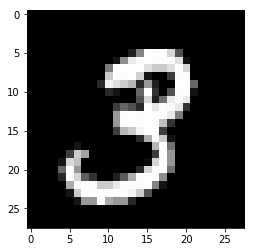

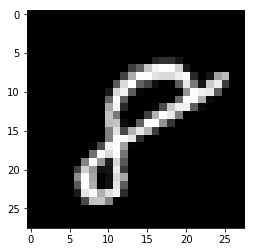

In [4]:
#Splitting data into images and labels
mnist_images = mnist.train.images
mnist_labels = mnist.train.labels

#Picking two number classes - 3 and 8

data= np.concatenate((mnist_images[np.where(mnist_labels == 3)],mnist_images[np.where(mnist_labels == 8)])) #images
labels = np.concatenate((mnist_labels[np.where(mnist_labels == 3)], mnist_labels[np.where(mnist_labels == 8)]))

#Plotting examples

#Plotting a 3
first_image = data[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28)) #The reshape pixels are the squareroot of the image size
plt.imshow(pixels, cmap='gray')
plt.show()

#Plotting an 8
second_image = data[-1]
second_image = np.array(second_image, dtype='float')
pixels = second_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [5]:
#Splitting data into training and test
data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.25, random_state = 0)

#For loop that carries out the training of the model for the different kernels

for i in ['linear', 'poly', 'rbf']:
    
    #Training start time
    start= time.time()
    
    #Cross-validation of gamma and degree - important to get the least error rate for rbf and poly kernels
    parameters = {'gamma':[1,3],'degree':[1, 3]}
    svc = SVC(kernel= i)
    clf = GridSearchCV(svc, parameters)
    clf.fit(data_test, labels_test)
    
    #Training end time
    end = time.time()
    
    #Predicting labels
    labels_pred = clf.predict(data_test)
    
    #Printing training time and error rate for each kernel
    print(i.title())
    print('Training time -', end-start, 'seconds')
    print("Error rate: %.2f"
      %(1- accuracy_score(labels_test, labels_pred, normalize=True)))
    print('\n')

Linear
Training time - 12.53911828994751 seconds
Error rate: 0.01


Poly
Training time - 13.950353860855103 seconds
Error rate: 0.00


Rbf
Training time - 81.89674401283264 seconds
Error rate: 0.00




### Analysis of results

For this classification problem, I used cross-validation to get the optimal *gamma* and *degree*, because according to the SVM kernel documentation (http://scikit-learn.org/stable/modules/svm.html#svm-kernels), they were important parameters we use, to get the minimal error rate for the **poly** and **rbf** kernels. 

From the results above, in terms of **training time**, we see that the linear kernel has the *least* time, followed by the poly kernel and then the rbf kernel. They all had excellent test error rates; the poly and rbf kernels accurately classifying all the datapoints, and the linear kernel having an error rate of 0.01. Because the test error rates are extremely low, I would be able to use these models in real-life applications.

Although having a very low test error rate is important to show the optimality of a model, especially in a real-world scenario,for this particular problem of identifying 3s from 8s, I would not choose to use the *rbf kernel* because it has a very high training time, compared to the other two kernels which also have very low error rates. 
I would instead choose the *poly* kernel. This is because it has the least test error rate possible, and its training time is just one second slower than that of the linear kernel, which is very small and as such, we can ignore.

However, if the number of datapoints increases and the test error rates remain fairly the same or are zero/ the same for both kernels, I would choose the kernel with the least running time, which would be the *linear* kernel. As shown below in the appendix, it has the same error rate as the poly kernel, but is 5 seconds faster to train. As the number of datapoints increases, I believe the linear model would be trained faster than the poly kernel, which is optimal, especially as they both have the same error rate.

In [57]:
# Appendix: Checking to see the training time and error rate when we use the entire dataset, which is considerably larger(5 times larger) than what we were using before.

mnist_images = mnist.train.images
mnist_labels = mnist.train.labels


#Splitting data into training and test
data_train, data_test, labels_train, labels_test = train_test_split(mnist_images, mnist_labels, test_size = 0.1, random_state = 0)

#For loop that carries out the training of the model for the different kernels

for i in ['linear', 'poly']:
    
    #Training start time
    start= time.time()
    
    #Cross-validation of gamma and degree - important to get the least error rate for rbf and poly kernels
    parameters = {'gamma':[1,3],'degree':[1, 3]}
    svc = SVC(kernel= i)
    clf = GridSearchCV(svc, parameters)
    clf.fit(data_test, labels_test)
    
    #Training end time
    end = time.time()
    
    #Predicting labels
    labels_pred = clf.predict(data_test)
    
    #Printing training time and error rate for each kernel
    print(i.title())
    print('Training time -', end-start, 'seconds')
    print("Error rate: %.2f"
      %(1- accuracy_score(labels_test, labels_pred, normalize=True)))
    print('\n')

Linear
Training time - 96.67296600341797 seconds
Error rate: 0.00


Poly
Training time - 101.91827917098999 seconds
Error rate: 0.00


